---

# Lecture 7

---

- [**1. Plotting with Pylab/Matplotlib**](#1.-Plotting-with-Pylab/Matplotlib)


- [**2. Numerical derivatives**](#2.-Numerical-derivatives)

    - [**2.1. Example of function differentiation**](#2.1.-Example-of-function-differentiation)
    - [**2.2. Comparison with numerical derivatives**](#2.2.-Comparison-with-numerical-derivatives)


- [**3. Root finding**](#3.-Root-finding)

    - [**3.1. The bisection algorithm**](#3.1.-The-bisection-algorithm)
    - [**3.2. The Newton algorithm**](#3.2.-The-Newton-algorithm)
    

---

## 1. Plotting with Matplotlib / Pylab

- Matplotlib tries to make easy things easy and hard things possible


- Matplotlib is a  2D plotting library which produces publication quality figures (and also 3D)


- Matplotlib can be fully scripted but interactive interface is available


In [1]:
import pylab
import matplotlib.pyplot as plt  # we'll use this later

In [2]:
x = [0, 1, 2, 3, 4]            # list of elements x

In [3]:
y = [0, 0.1, 0.2, 0.3, 0.4]    # list of elements y

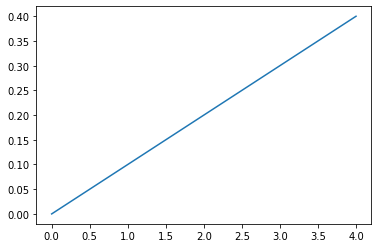

In [4]:
pylab.plot(x, y)      # plot the data
pylab.show()          # show the plot (use at the end)

- The `plot` command generates the plot of the data as shown. 

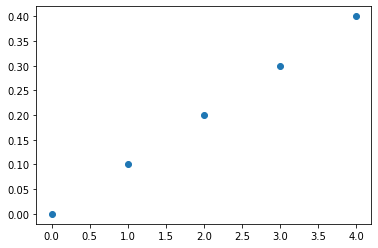

In [5]:
pylab.plot(x, y, 'o')
pylab.show()

- Can also annotate axes

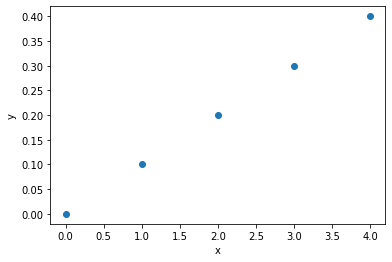

In [6]:
pylab.plot(x, y, 'o')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()

### 1.1. Matplotlib figures: inline or as separate window

Within the IPython console (for example in Spyder) and the Jupyter Notebook, use:

- `%matplotlib inline` to see plots inside the console window, 

- `%matplotlib auto` to create pop-up windows with the plot when the `matplotlib.show()` command is used.

- we can manipulate the view interactivelly in that window

In Jupyter notebooks, use `%matplotlib notebook` to get interactive control of the figure.

### 1.2. Pylab and Matplotlib

__Pylab__ 


- a Matlab-like (state-driven) plotting interface (and comes with matplolib)


- convenient for 'simple' plots


- make use of `help(pylab.plot)` to remind you of line styles, symbols etc.


- check gallery at: http://matplotlib.org/gallery


__Matplotlib.pyplot__ 


- an object oriented plotting interface


- very fine grained control over plots


- check gallery at: http://matplotlib.org/gallery


- Try Matplotlib notebook (on module's home page) as an introduction and useful reference

---

## 2. Numerical derivatives

- Motivation:
  - We need derivatives of functions for some optimisation and root finding algorithms
  - Not always is the function analytically known (but we are usually able to compute the function numerically)
  - The material presented here forms the basis of the finite-difference technique that is commonly used to solve ordinary and partial differential equations.

1. Definition of __forward difference__ numerical derivative:

  $$f'(x) = \frac{df}{dx}(x) = \lim\limits_{h\rightarrow 0}
  \frac{f(x+h) - f(x)}{h} \approx\frac{f(x+h) - f(x)}{h}$$<br>

  - we can now compute _an approximation_ of $f{\, }'$ simply by evaluating $f$

  - this is called the forward difference because we use $f(x)$ and $f(x+h)$
  
  - the error we make is of the order of ${\cal O}(h)$<br><br>

2. Definition of __backward difference__ numerical derivative:

  $$f'(x) = \frac{df}{dx}(x) = \lim\limits_{h\rightarrow 0} 
  \frac{f(x) - f(x-h)}{h} \approx\frac{f(x) - f(x-h)}{h}$$<br>

  - this is called the backward difference because we use $f(x)$ and $f(x-h)$
  
  - the error we make is of the order of ${\cal O}(h)$<br><br>

3. Definition of __central difference__ numerical derivative:

  $$f'(x) = \frac{df}{dx}(x) = \lim\limits_{h\rightarrow 0} 
  \frac{f(x+h) - f(x-h)}{2h} \approx\frac{f(x+h) - f(x-h)}{2h}$$<br>

  - this is called the central difference because we $f(x+h)$ and $f(x-h)$
  - the error we make is of the order of ${\cal O}(h^2)$, thus _the central difference method is the most accurate_
  

### 2.1. Example of function differentiation

Consider function:

$f(x) = x^2(x-2)$

In [7]:
def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

The analytical derivative is:

  $f'(x) = 3x^2 - 4x$

In [8]:
def fprime(x):
    """returns f'(x)=3x^2-4x"""
    return 3 * x ** 2 - 4 * x

- Plot both $f(x)$ and $f'(x)$ in the interval from $x_0=-1$ to $x_n = 2.5$ assuming step $dx = 0.1$:

In [9]:
x0 = -1.0  # interval starting point
xn = 2.5   # interval last point
dx = 0.1   # step

In [10]:
N = int((xn-x0)/dx)   # number of points in the interval

In [11]:
x = [(xn-x0)/(N-1)*i + x0 for i in range(N)]  # use list comprehension to generate x

In [12]:
y = [f(x[i]) for i in range(len(x))]  # use list to comprehension to generate y

In [13]:
yprime = [fprime(x[i]) for i in range(len(x))]

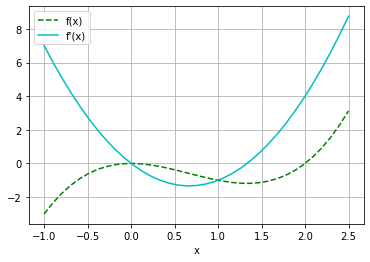

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y, 'g--', label='f(x)')  # green dashed line
ax.plot(x, yprime, 'c-', label="f'(x)")  # cyan solid line
ax.set_xlabel('x')  # label for x-axis
ax.legend()      
ax.grid(True)  # turn on grid

- we can also use NumPy

In [15]:
import numpy

In [16]:
x0 = -1.0  # interval starting point
xn = 2.5   # interval last point
dx = 0.1   # step

In [17]:
x = numpy.arange(x0, xn, dx)  # array of points in the interval

In [18]:
y = f(x)  # function values over the array x

In [19]:
yprime = fprime(x)  # function derivative values over the array x

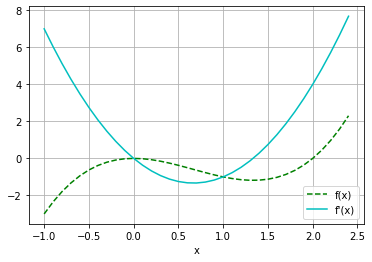

In [20]:
fig, ax = plt.subplots()
ax.plot(x, y, 'g--', label='f(x)')  # green dashed line
ax.plot(x, yprime, 'c-', label="f'(x)")  # cyan solid line
ax.set_xlabel('x')  # label for x-axis
ax.legend()      
ax.grid(True)  # turn on grid

### 2.2. Comparison with numerical derivatives

- implement function for evaluating the derivatives


- plot to evaluate accuracy against analytical solution<br><br>

Forward difference derivative: $\hskip1cm f'(x)\approx\frac{f(x+h) - f(x)}{h}$

In [21]:
def fprime_forward(f, x0, h=1e-1):
    """
    Returns derivative of function f(x) evaluated at point x0 
    using the forward difference approximation with step h.
    """
    return (f(x0+h) - f(x0)) / h

Central differnce derivative:$\hskip1cm f'(x)\approx\frac{f(x+h) - f(x-h)}{2h}$

In [22]:
def fprime_central(f, x0, h=1e-1):
    """
    Returns derivative of function f(x) evaluated at point x0 
    using the central difference approximation with step h.
    """
    return (f(x0+h) - f(x0-h)) / (2*h)

- Derivative of our earlier defined function $f(x) = x^2(x-2)$ at $x=0.5$:


- analytic solution $f'(x) = 3x^2 - 4x$:

In [23]:
fprime(0.5)

-1.25

- forward difference:

In [24]:
fprime_forward(f, 0.5)

-1.29

- central difference:

In [25]:
fprime_central(f, 0.5)

-1.2399999999999995

- Central difference derivative more accurate than forward difference!


- Plot it:

In [26]:
x0 = -1.0  # interval starting point
xn = 2.5   # interval last point
dx = 0.1   # step

In [27]:
x = numpy.arange(x0, xn, dx)

In [28]:
y = f(x)

In [29]:
yprime = fprime(x)

In [30]:
yprime_forward = fprime_forward(f, x)

In [31]:
yprime_central = fprime_central(f, x)

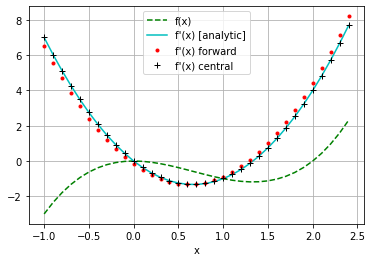

In [32]:
fig, ax = plt.subplots()
ax.plot(x, y, 'g--', label='f(x)')
ax.plot(x, yprime, 'c-', label="f'(x) [analytic]")
ax.plot(x, yprime_forward, 'r.', label="f'(x) forward")
ax.plot(x, yprime_central, 'k+', label="f'(x) central")

ax.set_xlabel('x')
ax.legend(loc=0)
ax.grid(True)

---

## 3. Root finding

- Given a function $f(x)$, we are searching an $x_0$ so $f(x_0)=0$. We call $x_0$ a root of $f(x)$.


- We introduce two methods:

  - Bisection method
  - Newton method


### 3.1. The bisection algorithm

Function: `bisect(f, a, b)`


Assumptions:

- Given: $a$  (float)
- Given: $b$  (float)
- Given: $f(x)$, continuous with single root in $[a,b]$, i.e. $f(a)f(b) < 0$
- Given: $f_\mathrm{tol}$ (float), for example $f_\mathrm{tol}=10^{-6}$

The bisection method returns $x$ so that $|f(x)|<$ftol:

1. $x = (a+b)/2$<br><br>
2. `while` $|f(x)| >$ `ftol` `do`
   - `if` $f(x)f(a) > 0$
     - `then` $a \leftarrow x$ $\qquad \phantom{\mathrm{else}b}$  \# throw away left half
     - `else` $b \leftarrow x$ $\qquad \phantom{\mathrm{then}a}$  \# throw away right half<br><br>
   - $x = (a+b)/2$<br><br>
3. return $x$

It turns out `scipy` library has implementation of bisection algorithm which we can use directly.

#### 3.1.1. The bisection function using `scipy` (scientific python library)

- `from scipy.optimize import bisect`
- `bisect(f, a, b, args=(), xtol=2e-12, rtol=8.88e-16, maxiter=100, full_output=False, disp=True)`
  - `f` is the function for which we search $x$ such that $f(x)=0$
  - `a` is the lower limit of the bracket $[a, b]$ around the root
  - `b` is the upper limit of the bracket $[a, b]$ around the root
  - `xtol` is an _optional_ parameter that can be used to modify the default accuracy of `xtol` $=10^{-12}$<br><br>

- the `bisect` function stops 'bisecting' the interval around the root when `|b-a|<xtol`.

### 3.2. The Newton algorithm

- Newton method for root finding: find  $x_0$ so that $f(x_0) = 0$.

- Idea: close to the root, the tangent of $f(x)$ is likely to point to the root. Make use of this information.


- Algorithm:

  `while` $|f(x)|>$`ftol`, `do`

  $\quad\quad\quad x = x - \frac{f(x)}{f'(x)}$

  where $f'(x)=\frac{df}{dx}(x).$<br><br>

- Much better convergence than bisection method
- but not guaranteed to converge.
- Need a good initial guess $x$ for the root.



#### 3.2.1. The Newton function using `scipy` (scientific python library)

- `from scipy.optimize import newton`
- `newton(f, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None)`
  - `f` is the function for which we search $x$ such that $f(x)=0$
  - `x0` is an initial estimate of the zero that should be somewhere near the actual zero (optional)
  - `fprime` is the derivative of the function when available and convenient (optional)
  - `xtol` is the allowable error of the zero value (optional)<br><br>

- the `newton` function stops when `|x-x0|<xtol`.

### 3.3. Examples of root finding

- Find root of function $f(x)=x^2(x-2)$
- $f$ has a double root at $x=0$, and a single root at $x=2$.
- Ask algorithm to find single root at $x=2$.

- Define function $f(x)=x^2(x-2)$

In [33]:
def f(x):
    """
    Returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2.
    """
    return x ** 3 - 2 * x ** 2

- Explore function by plotting it:

In [34]:
x = numpy.arange(-1, 2.5, 0.1)
y = f(x)

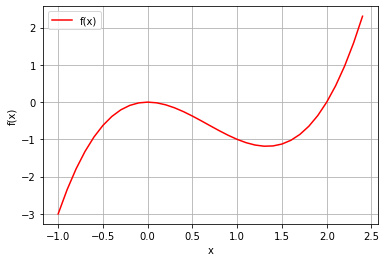

In [35]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', label='f(x)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)

- We see there are two points x where $f(x)=0$, these are the roots.

__Use bisection algorithm from scipy to find roots__

In [36]:
from scipy.optimize import bisect

In [37]:
xroot = bisect(f, a=1.5, b=3, xtol=1e-6)

In [38]:
print("Root x is approx. x={}.".format(xroot))
print("The error is less than 1e-6.")
print("The exact error is {}.".format(2 - xroot))

Root x is approx. x=2.000000238418579.
The error is less than 1e-6.
The exact error is -2.384185791015625e-07.


__Use the Newton algorithm from scipy to find roots__

In [39]:
from scipy.optimize import newton

In [40]:
xroot = newton(f, x0=1.5)

In [41]:
print("Root x is approx. x={}.".format(xroot))
print("The error is less than 1e-6.")
print("The exact error is {}.".format(2 - xroot))

Root x is approx. x=2.0.
The error is less than 1e-6.
The exact error is 0.0.


__We can also:__

__Use `brentq` function from scipy to find roots__

In [42]:
from scipy.optimize import brentq

In [43]:
xroot = brentq(f, a=1.5, b=3, xtol=1e-6) 

In [44]:
print("Root x is approx. x={}.".format(xroot))
print("The error is less than 1e-6.")
print("The exact error is {}.".format(2 - xroot))

Root x is approx. x=2.0000000189582865.
The error is less than 1e-6.
The exact error is -1.8958286496228993e-08.


__Use `fsolve` function from scipy to find roots__

In [45]:
from scipy.optimize import fsolve # multidimensional solver

In [46]:
xroot = fsolve(f, x0=[1.6])

In [47]:
print("Root x is approx. x={}.".format(xroot))
print("The error is less than 1e-6.")
print("The exact error is {}.".format(2 - xroot[0]))

Root x is approx. x=[2.].
The error is less than 1e-6.
The exact error is 0.0.


### 3.4. Root finding summary

- Given the function f(x), applications for root finding include:

  - to find $x_1$ so that $f(x_1)=y$ for a given $y$ (this is
    equivalent to computing the inverse of the function $f$).
    
  - to find crossing point $x_c$ of two functions $f_1(x)$ and $f_2(x)$ (by finding root of
    difference function $g(x)=f_1(x)-f_2(x)$)


- Bisection method
  - Requires root in bracket [$a,b$]
  - guaranteed to converge (for single roots)
  - Library function: `scipy.optimize.bisect`


- Newton method
  - Requires good initial guess $x$ for root $x_0$
  - may never converge
  - but if it does, it is quicker than the bisection method
  - Library function: `scipy.optimize.Newton`


- Recommended method: `scipy.optimize.brentq` which combines the safe feature of the bisect method with the speed of the Newton method.


- For multi-dimensional functions $f(\mathbf{x})$, use `scipy.optimize.fsolve`.

---